In [6]:
import pandas as pd

# Load the Excel file
excel_file_path = "PHASE_1_DATA.xlsx" #I gatherd this data from this website :- 'https://www.indiacensus.net/literacy-rate.php'
excel_df = pd.read_excel(excel_file_path, sheet_name='Sheet1')

# Load the CSV file
csv_file_path = '17_Crime_by_place_of_occurrence_2001_2012.csv'
csv_df = pd.read_csv(csv_file_path)

# Display the first few rows of each dataset
print(excel_df.head())
print(csv_df.head())


  Unnamed: 0                 Unnamed: 1  Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0      S.No.                 State Name  Population  Literates  Area(km2)   
1          1  Andaman & Nicobar Islands      380581     294281       8249   
2          2             Andhra Pradesh    84580777   50556760     162968   
3          3          Arunachal Pradesh     1383727     766005      83743   
4          4                      Assam    31205576   19177977      78438   

  Unnamed: 5  
0   Literacy  
1     0.8663  
2     0.6702  
3     0.6538  
4     0.7219  
            STATE/UT  YEAR  RESIDENTIAL PREMISES - Dacoity  \
0     ANDHRA PRADESH  2001                             100   
1  ARUNACHAL PRADESH  2001                               9   
2              ASSAM  2001                             381   
3              BIHAR  2001                             818   
4       CHHATTISGARH  2001                              54   

   RESIDENTIAL PREMISES - Robbery  RESIDENTIAL PREMISES - Burglary  \
0   

Now we will clean and prepare the data:- To set the correct header for the Excel data and Ensuring both the datasets have a commin key(state name) for merging.

In [7]:
# Setting the correct header for the Excel data
excel_df.columns = excel_df.iloc[0]
excel_df = excel_df[1:]

# Renaming columns for easier access to the data
excel_df.columns = ['S.No', 'State Name', 'Population', 'Literates', 'Area(km2)', 'Literacy Rate']

# Converting relevant columns to numeric types
excel_df['Population'] = pd.to_numeric(excel_df['Population'], errors='coerce')
excel_df['Literates'] = pd.to_numeric(excel_df['Literates'], errors='coerce')
excel_df['Area(km2)'] = pd.to_numeric(excel_df['Area(km2)'], errors='coerce')
excel_df['Literacy Rate'] = pd.to_numeric(excel_df['Literacy Rate'], errors='coerce')

# Ensuring the 'State Name' column is consistent between both datasets
excel_df['State Name'] = excel_df['State Name'].str.strip().str.upper()
csv_df['STATE/UT'] = csv_df['STATE/UT'].str.strip().str.upper()

# Displaying the cleaned Excel data
print(excel_df.head())


  S.No                 State Name   Population   Literates  Area(km2)  \
1    1  ANDAMAN & NICOBAR ISLANDS     380581.0    294281.0     8249.0   
2    2             ANDHRA PRADESH   84580777.0  50556760.0   162968.0   
3    3          ARUNACHAL PRADESH    1383727.0    766005.0    83743.0   
4    4                      ASSAM   31205576.0  19177977.0    78438.0   
5    5                      BIHAR  104099452.0  52504553.0    94163.0   

   Literacy Rate  
1         0.8663  
2         0.6702  
3         0.6538  
4         0.7219  
5         0.6180  


Now we will merge the Literacy data with the crime data on the state name.

In [8]:
# Merging the datasets on the 'State Name' column
merged_df = pd.merge(excel_df, csv_df, left_on='State Name', right_on='STATE/UT')

# Displaying the merged dataframe
print(merged_df.head())


  S.No      State Name  Population   Literates  Area(km2)  Literacy Rate  \
0    2  ANDHRA PRADESH  84580777.0  50556760.0   162968.0         0.6702   
1    2  ANDHRA PRADESH  84580777.0  50556760.0   162968.0         0.6702   
2    2  ANDHRA PRADESH  84580777.0  50556760.0   162968.0         0.6702   
3    2  ANDHRA PRADESH  84580777.0  50556760.0   162968.0         0.6702   
4    2  ANDHRA PRADESH  84580777.0  50556760.0   162968.0         0.6702   

         STATE/UT  YEAR  RESIDENTIAL PREMISES - Dacoity  \
0  ANDHRA PRADESH  2001                             100   
1  ANDHRA PRADESH  2002                             110   
2  ANDHRA PRADESH  2003                              86   
3  ANDHRA PRADESH  2004                             120   
4  ANDHRA PRADESH  2005                             109   

   RESIDENTIAL PREMISES - Robbery  ...  COMMERCIAL ESTABLISHMENTS - Burglary  \
0                             177  ...                                  1041   
1                           

Now, in this step we will do the analysis for literacy rate vs total crimes, type of crime vs each state vs literacy rate, year-on-year total crime rate, area vs overall crime, population vs overall crime, and generating each state's crime report.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total crimes for each state
crime_columns = [col for col in merged_df.columns if 'TOTAL -' in col]
merged_df['Total Crimes'] = merged_df[crime_columns].sum(axis=1)
merged_df

,S.No,State Name,Population,Literates,Area(km2),Literacy Rate,STATE/UT,YEAR,RESIDENTIAL PREMISES - Dacoity,RESIDENTIAL PREMISES - Robbery,...,COMMERCIAL ESTABLISHMENTS - Theft,OTHER PLACES - Dacoity,OTHER PLACES - Robbery,OTHER PLACES - Burglary,OTHER PLACES - Theft,TOTAL - Dacoity,TOTAL - Robbery,TOTAL - Burglary,TOTAL - Theft,Total Crimes
0,2,ANDHRA PRADESH,84580777.0,50556760.0,162968.0,0.6702,ANDHRA PRADESH,2001,100,177,...,2502,37,232,862,8849,214,629,7220,16751,24814
1,2,ANDHRA PRADESH,84580777.0,50556760.0,162968.0,0.6702,ANDHRA PRADESH,2002,110,230,...,2911,46,218,594,8832,197,648,7628,19222,27695
2,2,ANDHRA PRADESH,84580777.0,50556760.0,162968.0,0.6702,ANDHRA PRADESH,2003,86,254,...,2991,41,225,1189,11572,176,660,9050,23408,33294
3,2,ANDHRA PRADESH,84580777.0,50556760.0,162968.0,0.6702,ANDHRA PRADESH,2004,120,257,...,2656,20,172,1058,11864,199,596,8457,23578,32830
4,2,ANDHRA PRADESH,84580777.0,50556760.0,162968.0,0.6702,ANDHRA PRADESH,2005,109,262,...,1872,63,331,1150,14026,250,794,7954,23778,32776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,36,WEST BENGAL,91276115.0,61538281.0,88752.0,0.7626,WEST BENGAL,2008,62,80,...,1745,82,393,168,10917,184,613,462,17334,18593
355,36,WEST BENGAL,91276115.0,61538281.0,88752.0,0.7626,WEST BENGAL,2009,70,104,...,1611,86,507,100,9583,214,751,329,17133,18427
356,36,WEST BENGAL,91276115.0,61538281.0,88752.0,0.7626,WEST BENGAL,2010,110,90,...,1649,108,466,101,10351,288,798,388,19389,20863
357,36,WEST BENGAL,91276115.0,61538281.0,88752.0,0.7626,WEST BENGAL,2011,72,112,...,2339,96,471,192,12710,236,760,455,21446,22897


2.1 Analysis of Literacy Rate vs Total Crimes

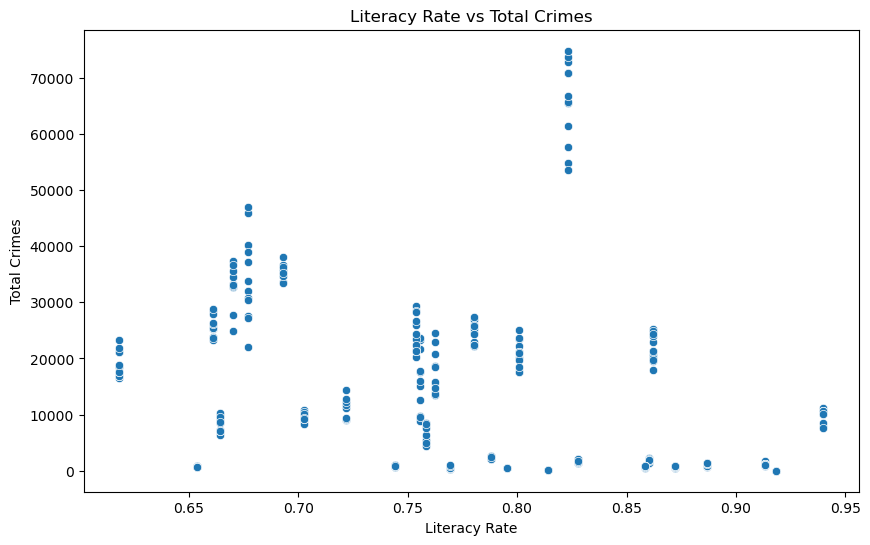

In [10]:
# 2.1 Analysis of Literacy Rate vs Total Crimes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Literacy Rate', y='Total Crimes')
plt.title('Literacy Rate vs Total Crimes')
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes')
plt.show()

The scatter plot shows the relationship between literacy rate and total crimes across different states. Here are some insights based on the visualization:
There is a wide range of total crimes for states with literacy rates between 0.65 and 0.75.
Some states with literacy rates around 0.75 have very high total crimes, reaching up to 70,000. States with a literacy rate around 0.70 have a range of total crimes from about 10,000 to over 50,000.
States with literacy rates around 0.85 tend to have lower total crimes, mostly below 10,000.
There are some outliers in the data as one state with a literacy rate  close to 0.80 has exceptionally high number of total crimes i.e approx 70000 and another state with literacy rate around 0.75 also has a notably high number of total crimes over 50000. States with very high literacy rates (close to 0.90) and those with low literacy rates (around 0.65) generally tend to have lower total crimes, mostly below 20,000.

2.2 Analysis of the type of crime vs each state vs Literacy rate

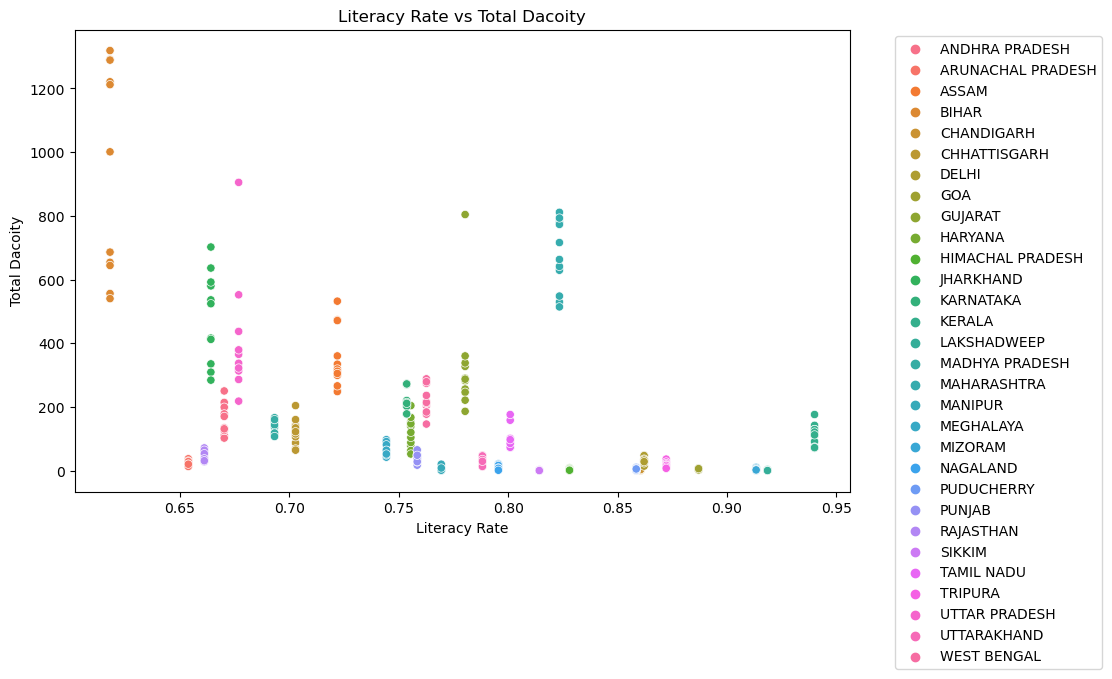

In [14]:
# 2.2 Analysis of the type of crime vs each state vs Literacy rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Literacy Rate', y='TOTAL - Dacoity', hue='State Name')
plt.title('Literacy Rate vs Total Dacoity')
plt.xlabel('Literacy Rate')
plt.ylabel('Total Dacoity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The x-axis represents literacy rates, ranging from 0.55 to 0.95.
The y-axis represents total docoity, with values ranging from 200 to 1200.
Here, we have taken total Dacoity as one of the crime type to analyse the data and there doesn’t appear to be a strong linear correlation between literacy rates and total docoity. Although, The points are scattered across the graph, suggesting that other factors may influence docoity levels.
Some states with similar literacy rates exhibit varying dooiity levels.

2.3 Analysis of year-on-year total crime rate

C:\Users\yadav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yadav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


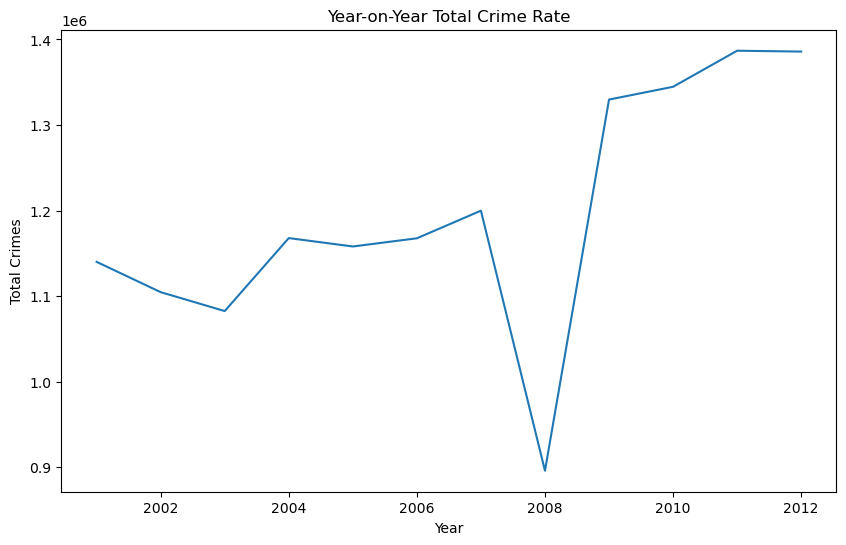

In [16]:
# 2.3 Analysis of year-on-year total crime rate
yearly_crime_df = csv_df.groupby('YEAR')[crime_columns].sum().reset_index()
yearly_crime_df['Total Crimes'] = yearly_crime_df[crime_columns].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_crime_df, x='YEAR', y='Total Crimes')
plt.title('Year-on-Year Total Crime Rate')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.show()

The graph shows fluctuations in the total number of crimes over the specified period.
Notably, there is a sharp decline in crime rates around 2008, followed by a subsequent increase.
2000–2008: Crime rates generally increase during this period.
Around 2008: A significant drop in crime rates occurs.
Post-2008: Crime rates rise again until the end of 2012.

2.4 Analysis of area vs overall crime

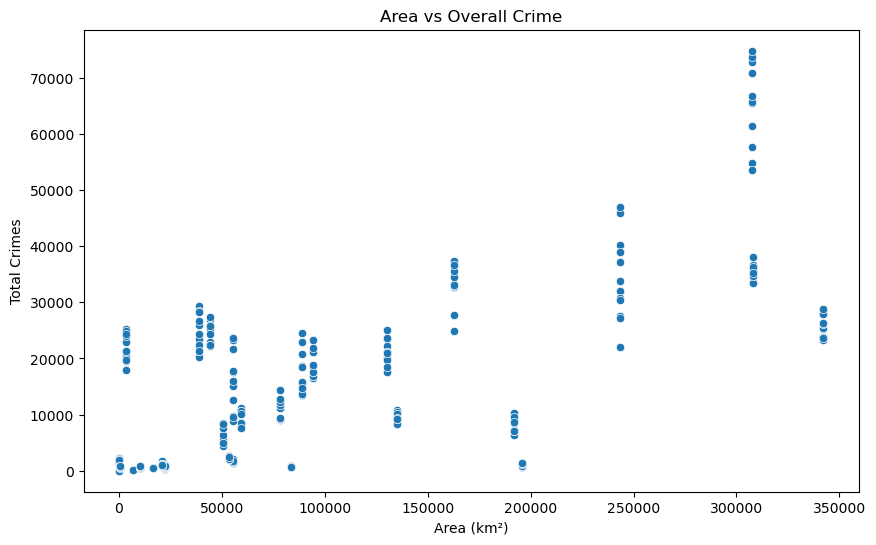

In [17]:
# 2.4 Analysis of area vs overall crime
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Area(km2)', y='Total Crimes')
plt.title('Area vs Overall Crime')
plt.xlabel('Area (km²)')
plt.ylabel('Total Crimes')
plt.show()

As the area (measured in square kilometers) increases, there is a visible trend of higher total crimes.
Most data points cluster between 0 and approximately 100,000 km² for area and between 0 and around 20,000 for total crimes.
Outliers exist with significantly higher crime rates that deviate from the general tren
Larger areas may experience more crime, but other factors could also influence crime rates.d.

2.5 Analysis of Population vs overall Crime

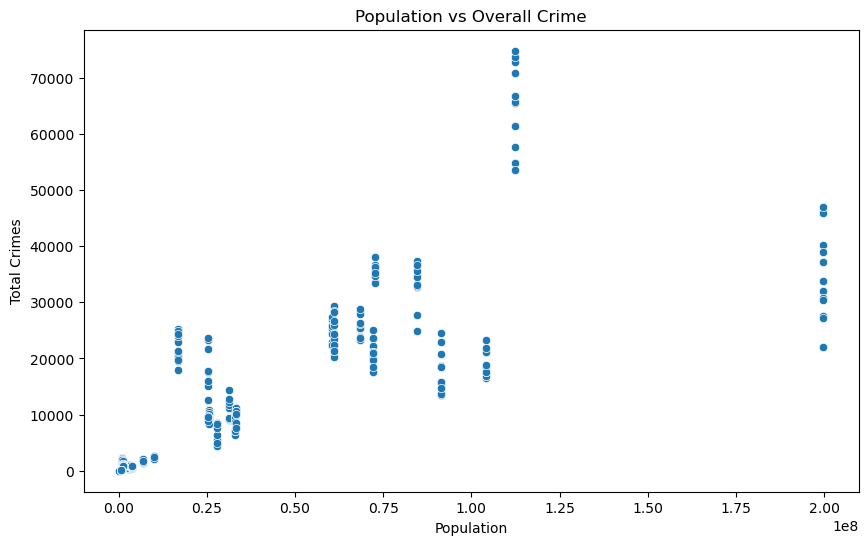

In [18]:
# 2.5 Analysis of Population vs overall Crime
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Population', y='Total Crimes')
plt.title('Population vs Overall Crime')
plt.xlabel('Population')
plt.ylabel('Total Crimes')
plt.show()

As population size increases, there is a general trend of higher total crimes.
However, there are two distinct clusters:
Lower Population Cluster: In this cluster, crime rates remain relatively low despite population growth.
Higher Population Cluster: Here, crime rates increase disproportionately with population size.

2.6 Each state crime report

In [21]:
# 2.6 Each state crime report
state_reports = []
for state in merged_df['State Name'].unique():
    state_df = merged_df[merged_df['State Name'] == state]
    report = f"Crime Report for {state}\n"
    report += f"Population: {state_df['Population'].values[0]}\n"
    report += f"Area: {state_df['Area(km2)'].values[0]}\n"
    report += f"Literacy Rate: {state_df['Literacy Rate'].values[0]}\n"
    for crime in crime_columns:
        report += f"{crime}: {state_df[crime].values[0]}\n"
    report += f"Total Crimes: {state_df['Total Crimes'].values[0]}\n"
    state_reports.append(report)

for report in state_reports: 
    print(report)
    print("\n" + "-"*40 + "\n")

Crime Report for ANDHRA PRADESH
Population: 84580777.0
Area: 162968.0
Literacy Rate: 0.6702
TOTAL - Dacoity: 214
TOTAL - Robbery: 629
TOTAL - Burglary: 7220
TOTAL - Theft: 16751
Total Crimes: 24814


----------------------------------------

Crime Report for ARUNACHAL PRADESH
Population: 1383727.0
Area: 83743.0
Literacy Rate: 0.6538
TOTAL - Dacoity: 22
TOTAL - Robbery: 84
TOTAL - Burglary: 248
TOTAL - Theft: 443
Total Crimes: 797


----------------------------------------

Crime Report for ASSAM
Population: 31205576.0
Area: 78438.0
Literacy Rate: 0.7219
TOTAL - Dacoity: 532
TOTAL - Robbery: 687
TOTAL - Burglary: 2423
TOTAL - Theft: 5367
Total Crimes: 9009


----------------------------------------

Crime Report for BIHAR
Population: 104099452.0
Area: 94163.0
Literacy Rate: 0.618
TOTAL - Dacoity: 1291
TOTAL - Robbery: 2203
TOTAL - Burglary: 3233
TOTAL - Theft: 9701
Total Crimes: 16428


----------------------------------------

Crime Report for CHANDIGARH
Population: 1055450.0
Area: 114

Total Crimes: Maharashtra has the highest number of total crimes at 57,707, while Lakshadweep has the lowest at 11.
Population: Uttar Pradesh has the highest population at 199,812,341, while Lakshadweep has the lowest at 64,473.
Literacy Rate: Kerala has the highest literacy rate at 94%, while Bihar has the lowest at 61.8%.
Crime Types: Theft is generally the most common crime across states.

We will also analyze the state report through graphs as well.

-->Crime Distribution Across States

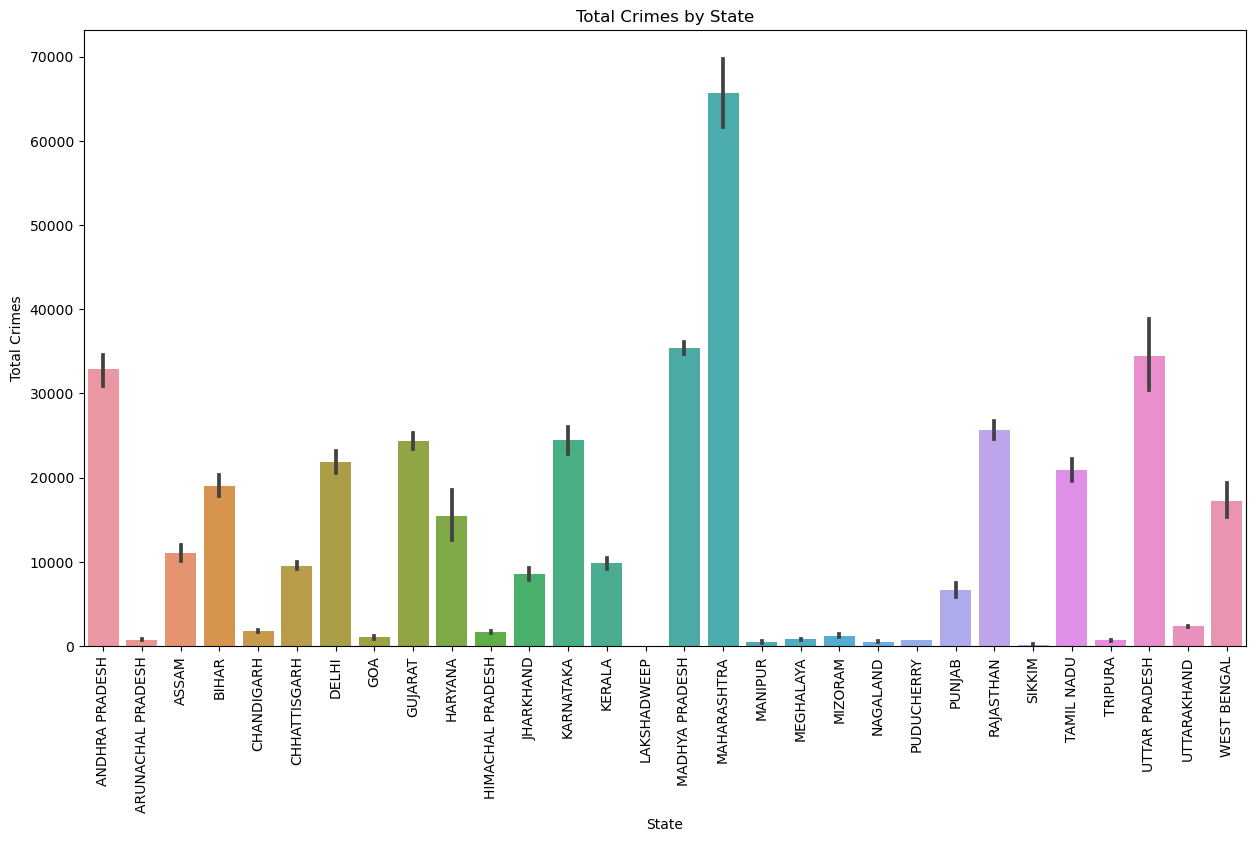

In [23]:
#Crime Distribution Across States
plt.figure(figsize=(15, 8))
sns.barplot(x='State Name', y='Total Crimes', data=merged_df)
plt.xticks(rotation=90)
plt.title('Total Crimes by State')
plt.xlabel('State')
plt.ylabel('Total Crimes')
plt.show()


-->Crimes by Type Across States

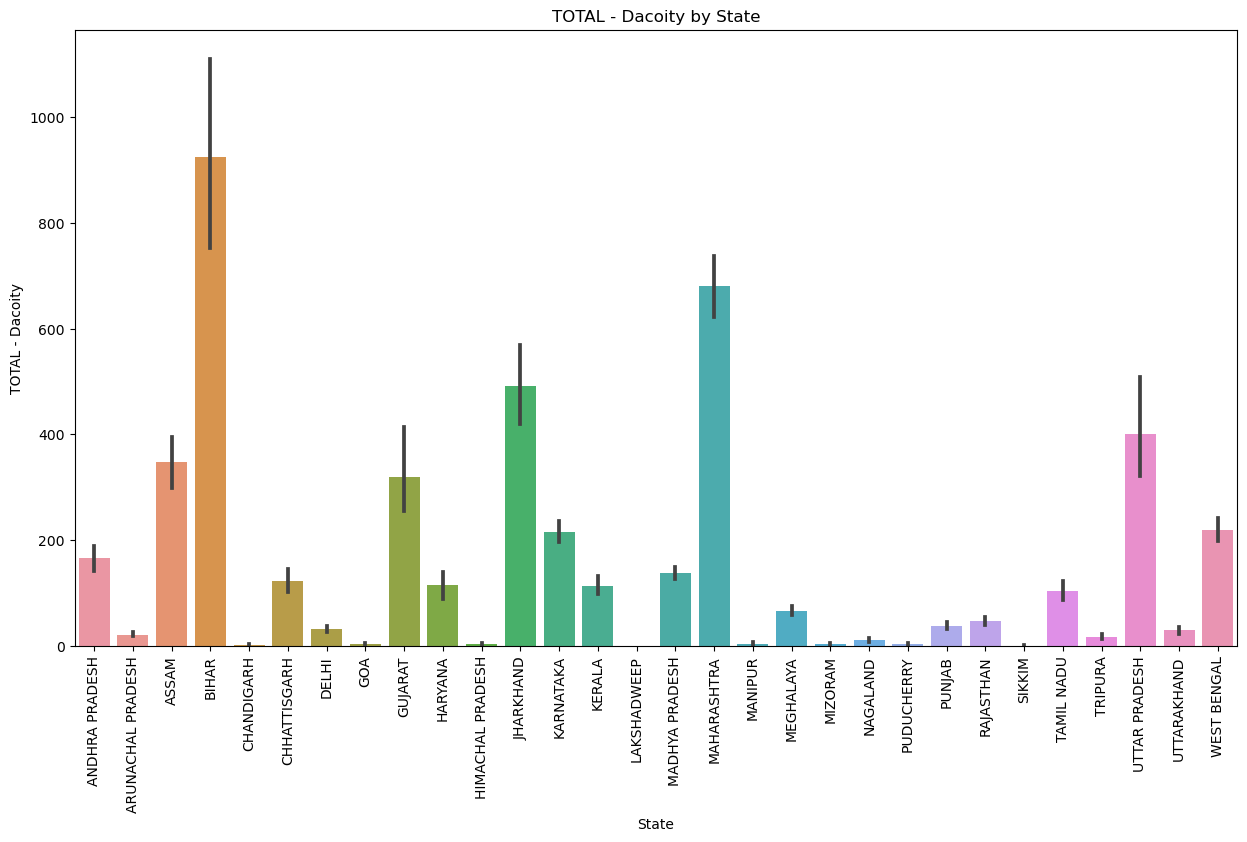

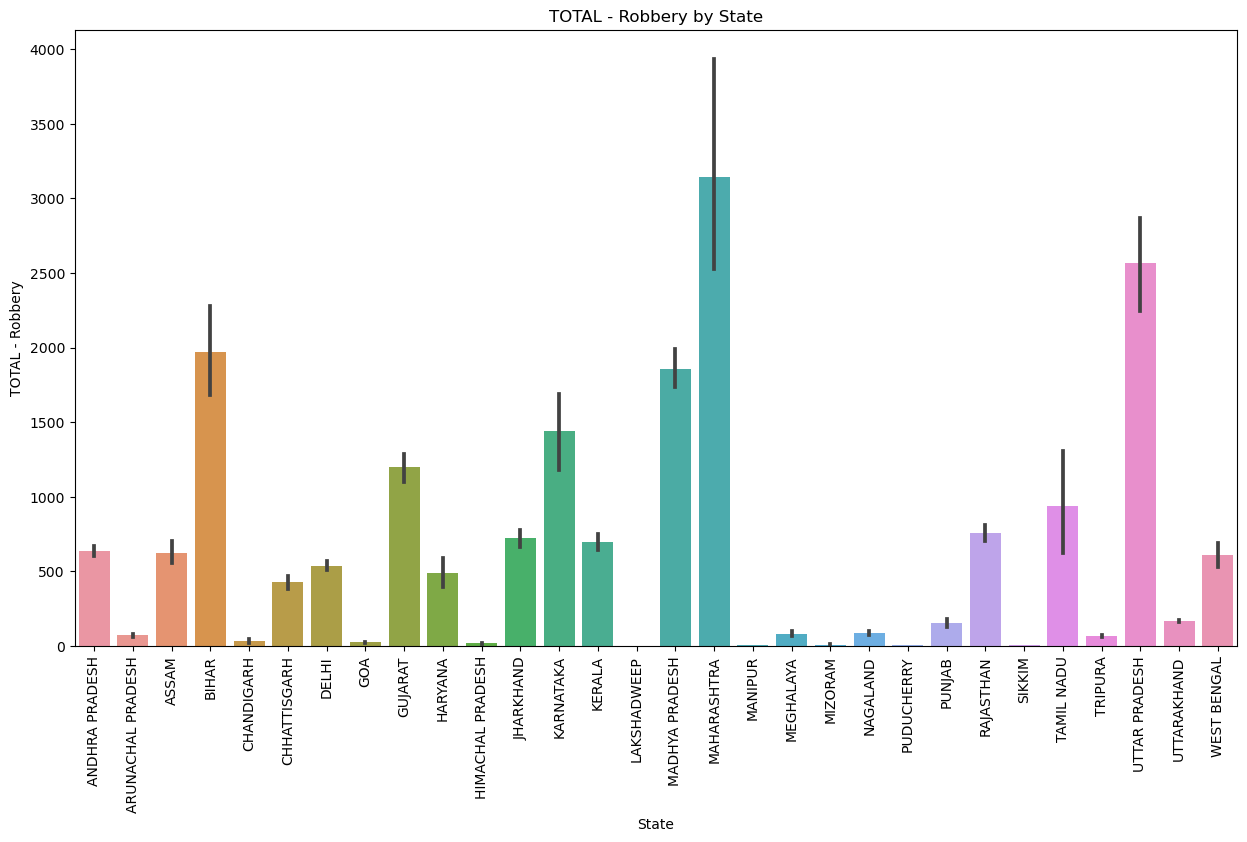

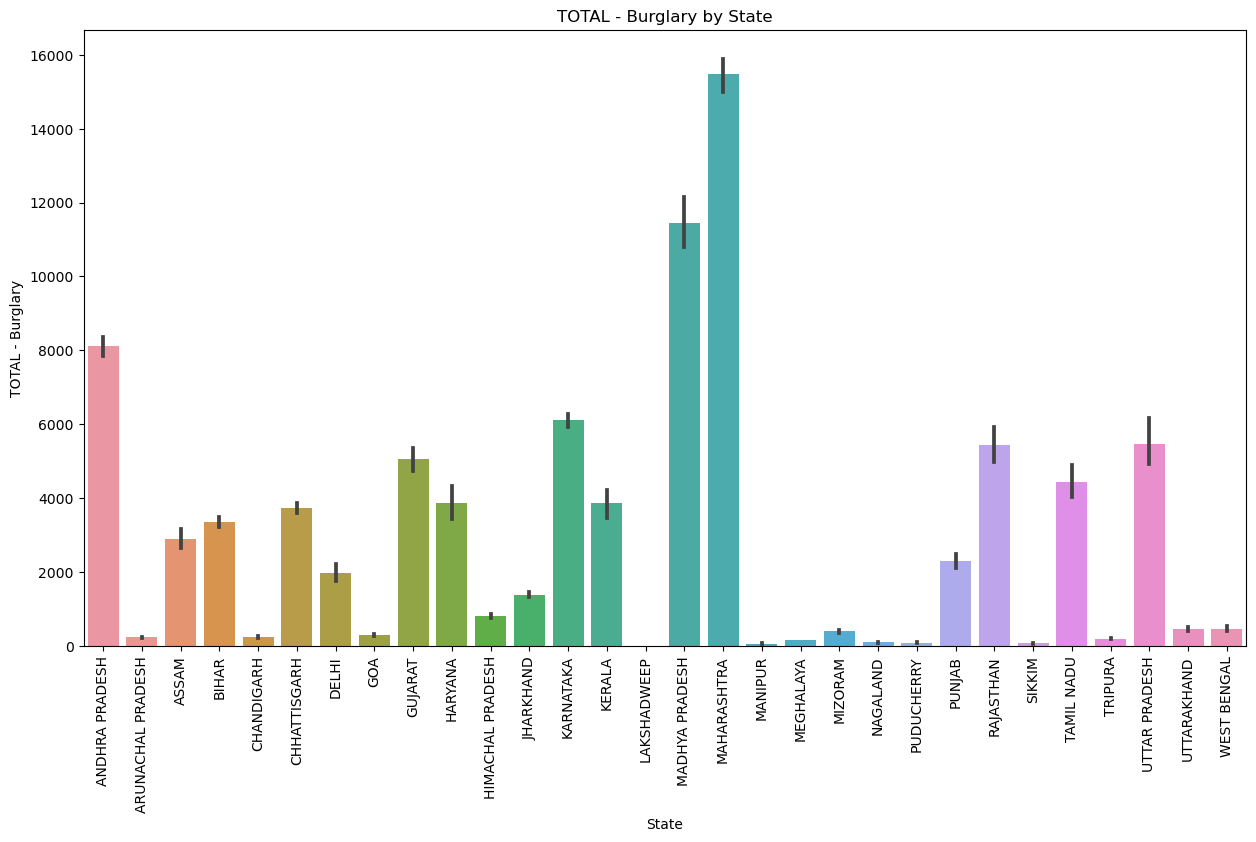

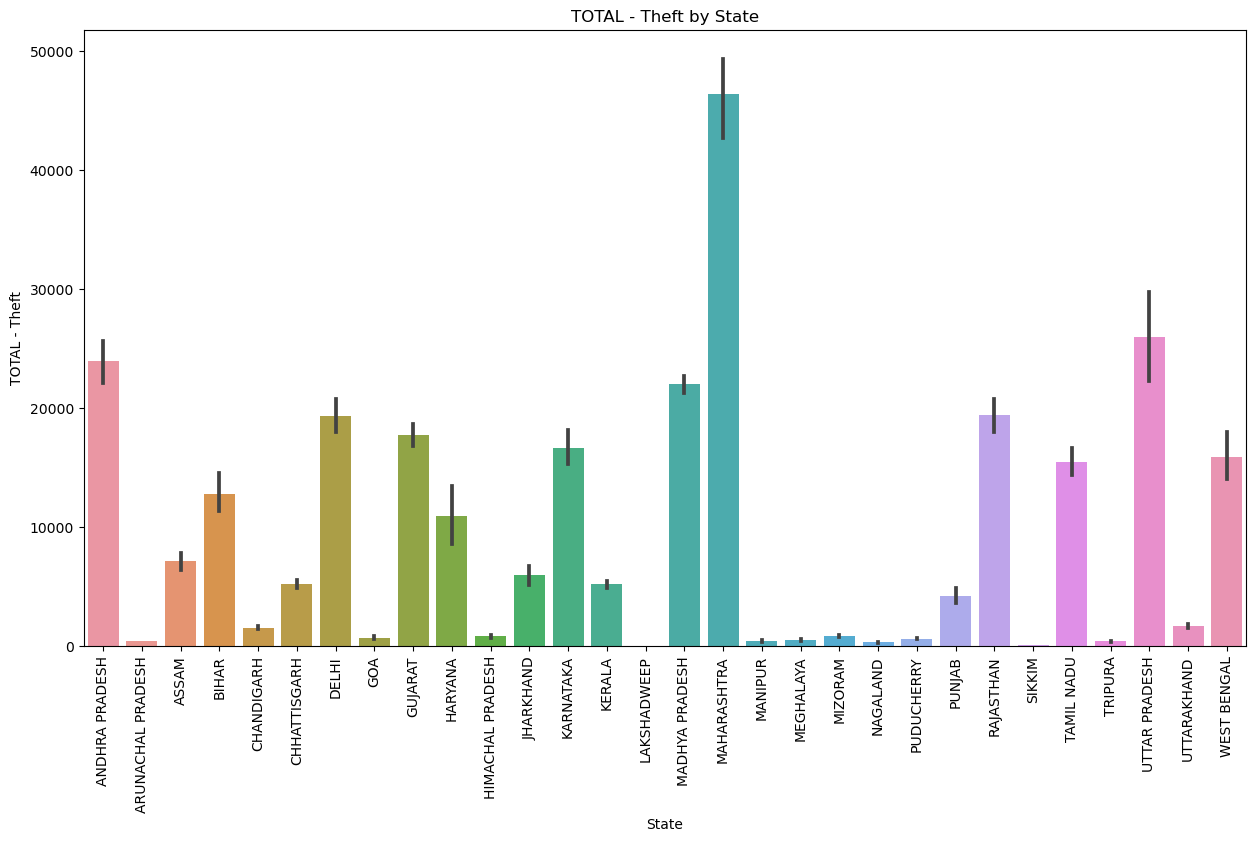

In [26]:
crime_types = ['TOTAL - Dacoity', 'TOTAL - Robbery', 'TOTAL - Burglary', 'TOTAL - Theft']

for crime in crime_types:
    plt.figure(figsize=(15, 8))
    sns.barplot(x='State Name', y=crime, data=merged_df)
    plt.xticks(rotation=90)
    plt.title(f'{crime} by State')
    plt.xlabel('State')
    plt.ylabel(crime)
    plt.show()


From this data we can see which state has higher or lower crime rate according to the crime type.

Brief Report on Crime Statistics Across Indian States and Union Territories:-

This report summarizes the crime statistics for various Indian states and union territories, highlighting population, area, literacy rate, and the incidence of key crimes such as dacoity, robbery, burglary, and theft. Below are key findings:

1.High Population States:


Uttar Pradesh: The most populous state with nearly 200 million people, recorded the highest total crimes (40,152), including significant numbers of robberies (3,825) and thefts (27,011).
Maharashtra: With a population of over 112 million, it reported a total of 57,707 crimes, with theft being the most prevalent crime (39,866 incidents).

2.Low Population States and UTs:

Lakshadweep: The least populous with around 64,473 residents, recorded the lowest crime rates with only 11 total crimes.
Sikkim: With a population of approximately 610,577, reported only 153 total crimes, reflecting relatively low crime rates.

3.Crime Distribution:

High Crime States:

Madhya Pradesh: Recorded 35,742 total crimes, with high incidences of burglary (13,549) and theft (20,263).
Rajasthan: Reported 25,172 total crimes, with significant burglary (7,284) and theft (16,939) cases.

Moderate Crime States:

Tamil Nadu: With a total of 23,504 crimes, notable for theft (16,709 incidents) and burglary (5,965).
Karnataka: Reported 20,287 total crimes, with significant theft (12,868) and burglary (6,394) figures.

Low Crime States:

Tripura: Reported 546 total crimes, indicating a relatively lower crime rate.
Himachal Pradesh: Recorded 1,476 total crimes, with burglary (844) and theft (600) being the primary concerns.

4.Literacy Rate Impact:

Kerala: With the highest literacy rate (94%), reported 10,608 total crimes, suggesting that higher literacy does not necessarily correlate with lower crime rates.
Bihar: Despite a lower literacy rate (61.8%), it recorded 16,428 total crimes, highlighting other influencing factors in crime rates.

5.Union Territories:

Delhi: With a population of 16.8 million, recorded a total of 22,977 crimes, reflecting high crime rates, especially in theft (19,276) and burglary (3,029).
Chandigarh: Reported 1,920 total crimes, indicating moderate crime rates in comparison to its population size (1.05 million).

Conclusion

The data indicates significant variation in crime rates across different states and union territories in India. Factors such as population size, area, and literacy rates show varying degrees of correlation with crime statistics. While some high-population states like Uttar Pradesh and Maharashtra report high crime rates, smaller states and UTs like Lakshadweep and Sikkim show significantly lower crime incidences. Literacy rates alone do not seem to be a definitive factor in determining crime rates, suggesting that other socio-economic variables might play a crucial role in influencing crime.